This image is:  <class 'numpy.ndarray'> with dimensions: (480, 640, 3)


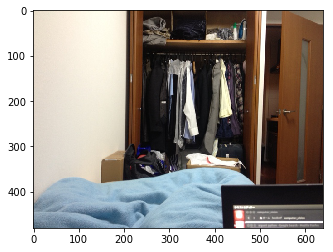

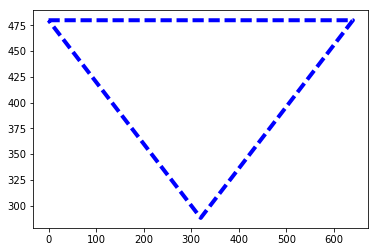

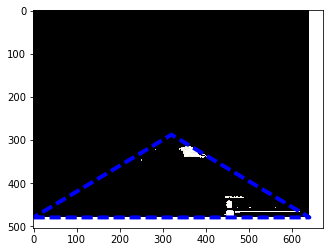

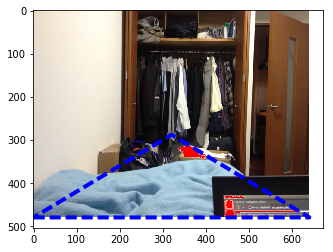

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print out some stats
image = mpimg.imread('/home/tk/bookref/computer_vision/room1.JPG')   #test.jpg

print('This image is: ',type(image), 
         'with dimensions:', image.shape)


# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize*.5, ysize*.6]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(image)
plt.show()

x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.show()

plt.imshow(color_select)
plt.plot(x, y, 'b--', lw=4)
plt.show()

plt.imshow(line_image)
plt.plot(x, y, 'b--', lw=4)
plt.show()

In [12]:
# Point !!!
# np.polyfit

#x,y
left_bottom = [0, 100]      
right_bottom = [200, 100]
apex = [200.5, 100*.6]

# deg(dimension)=1 polynominal fit (１次回帰分析)　: polyfit( xの配列、yの配列、deg)
# return  [A,B]  <=== y = Ax + B  

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

print(fit_left)

[ -0.19950125 100.        ]


In [25]:
# Point !!!
# meshgrid  升目の交点  YY ↑　↑
#                          　→ → 
#                       　 ↑　↑
#                          　→ → XX

XX, YY = np.meshgrid(np.arange(0, 3), np.arange(0, 5))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
print(XX)
print(YY)

print(XX*fit_left[0])
print(XX*fit_left[0] + fit_left[1])
print(YY > (XX*fit_left[0] + fit_left[1]))


[[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
[[-0.         -0.19950125 -0.39900249]
 [-0.         -0.19950125 -0.39900249]
 [-0.         -0.19950125 -0.39900249]
 [-0.         -0.19950125 -0.39900249]
 [-0.         -0.19950125 -0.39900249]]
[[100.          99.80049875  99.60099751]
 [100.          99.80049875  99.60099751]
 [100.          99.80049875  99.60099751]
 [100.          99.80049875  99.60099751]
 [100.          99.80049875  99.60099751]]
[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]]


In [ ]:
# 演算子 & = and　　| = or     ~ = not A